## 3차 과제 - 당뇨병을 예측해보자
- 주제: 데이터 분석 실습(머신러닝)
- 데이터: 피마 인디언 당뇨병 데이터
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
- 사용 라이브러리: numpy, pandas, matplotlib, sklearn


### 1. EDA, 전처리

1.1 분석을 위해 사용될 라이브러리들을 import 하세요.

numpy, pandas, matplotlib, sklearn(train_test_split, accurarcy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve, StandardScaler, LogisticRegression)

In [36]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


1.2 데이터를 불러오고 타겟 변수('Outcome')에 속한 값들의 비율과(value_counts 활용) 전체 데이터 앞 7개 값을 확인하세요.

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
diabetes_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DAT/diabetes.csv')

In [39]:
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(7)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


1.3 데이터의 feature 타입과 Null 개수를 확인하세요.

In [40]:

print(diabetes_data.info())
print(diabetes_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                      

1.4 예측을 위해 데이터를 feature 데이터 셋과 target 데이터 셋으로 나누세요.

In [41]:
diabetes_input = diabetes_data.drop('Outcome', axis=1).to_numpy()
diabetes_target = diabetes_data['Outcome'].to_numpy()

1.5 X와 y로 나눈 데이터 셋을 다시 train, test로 나누세요(test_size = 0.3, random_state=123, stratify=y).

In [42]:
train_input, test_input, train_target, test_target = train_test_split(diabetes_input, diabetes_target, test_size=0.3, random_state=123, stratify=diabetes_target)

1.6 test size는 어느정도로 해야 좋은지 그리고 왜 그래야 하는지 작성하세요.

train 셋의 비율이 너무 높으면 과적합될 가능성이 높다  
test 셋의 비율이 너무 높으면 모델 학습에 사용할 데이터가 부족해져 모델 정확도가 떨어질 수 있다  
일반적으로 수백 수천개의 데이터의 경우에는 7:3으로 하는 것이 적절하다.

1.7 stratify 값을 설정하는 이유와 언제 주로 사용되는지 서술하세요.

데이터 셋의 불균형 문제를 해결 하기 위해서 이다. 당뇨병이 아닌 데이터가 당뇨병 데이터보다 거의 두배 많고, 전체 데이터 수도 많지 않다.  
주로 데이터 셋의 불균형이 심하고, 데이터 수가 작을 때 편향을 해결하기 위해서 사용한다.

### 2. 예측 및 분석

2.1 성능 평가에 사용될 함수를 만들어보겠습니다. accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score로 구성되어 있으며 이를 한번에 출력할 수 있도록 합니다.

In [43]:
def clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    #accuracy, precision, recall, f1, roc_auc(roc_auc_score의 경우 y_test와 pred_proba로 측정)는 직접 작성
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차 행렬,\n', confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

2. 위에서 사용한 성능지표인 Confusion Matrix에 대해 설명하세요.

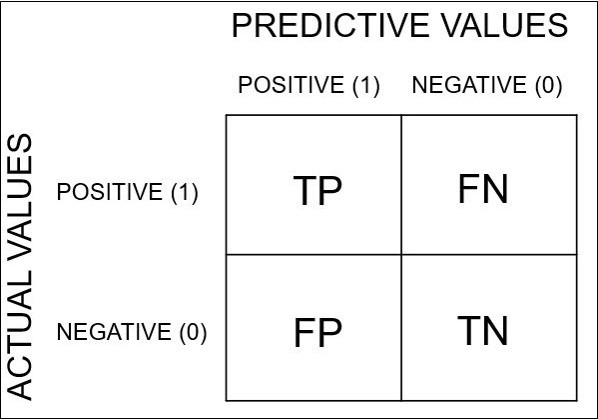

훈련을 통한 정확도 성능을 측정하기 위해 예측 값과 실제 값을 비교하기 위한 표  
T는 TRUE, F는 FALSE, P는 Positive, N은 Negative  
TP는 양성을 맞게, TN은 음성을 맞게, FP는 음성을 양성으로(가짜 양성), FN은 양성을 음성(가짜 음성)으로 예측한 것

2.2 로지스틱 회귀로 예측 후 위에서 만든 clf_eval() 함수를 통해 잘 예측했는지 확인하세요(solver='linear'로 설정, 예측 변수명은 pred, pred_proba).

In [44]:
lr=LogisticRegression(solver='liblinear')
lr.fit(train_input,train_target)
pred = lr.predict(test_input)
pred_proba = lr.predict_proba(test_input)[:,1]
#print(pred_proba)
clf_eval(test_target, pred, pred_proba)

오차 행렬,
 [[134  16]
 [ 39  42]]
정확도: 0.7619, 정밀도: 0.7241, 재현율: 0.518519, F1: 0.6043, AUC:0.8436


2.3 LogisticRegression에서 solver 파라미터의 역할과 어떤 것들이 있고 각각은 무엇을 의미하는지 작성하세요.

solver 파라미터는 LogisticRegression 모델이 학습하는데 사용하는 최적화 알고리즘을 지정한다.  

'newton-cg': 뉴턴-CG 알고리즘은 일반적으로 빠르고 안정적이다. 하지만 데이터 세트가 크면 계산 비용이 많이 들 수 있다.  
'lbfgs': L-BFGS 알고리즘은 뉴턴-CG 알고리즘보다 빠르지만 덜 안정적이다.  
'liblinear': LIBLINEAR 알고리즘은 대규모 데이터 세트에 적합하다. 하지만 L2 규제만 지원한다.  
'sag': SAG 알고리즘은 대규모 데이터 세트에 적합하다. 하지만 모든 손실 함수를 지원하지 않는다.  
'saga': SAGA 알고리즘은 SAG 알고리즘의 변형으로 더 빠르고 안정적이다. 하지만 모든 손실 함수를 지원하지 않는다.

2.4 pred와 pred_proba는 각각 어떤 차이가 있는지 작성하세요.

pred는 test_input을 모델을 통해 예측한 값, 즉 양성인지 음성인지를 나타낸다.
pred_proba는 모델을 통해 예측한 확률, 즉 양성일 확률을 나타낸다.

2.5 전체 데이터 중 약 65%가 Negative이므로 재현율 성능에 조첨을 맞추겠습니다. 정밀도 재현율 curve를 보고 임계값 별 정밀도 재현율 값의 변화를 확인하기 위해 이를 위한 함수를 작성하겠습니다.

In [45]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    #X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

    #threshold 값 X축의 Scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    #X축, y축 label과 legend, grid 설정
    ### 직접 작성(xlabel - 'Threshold value', ylabel = 'Precision and Recall value'), legend, grid는 default값으로
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()

2.6 작성한 함수를 바탕으로 임계값 별 정밀도와 재현율 값 변화를 확인하세요.

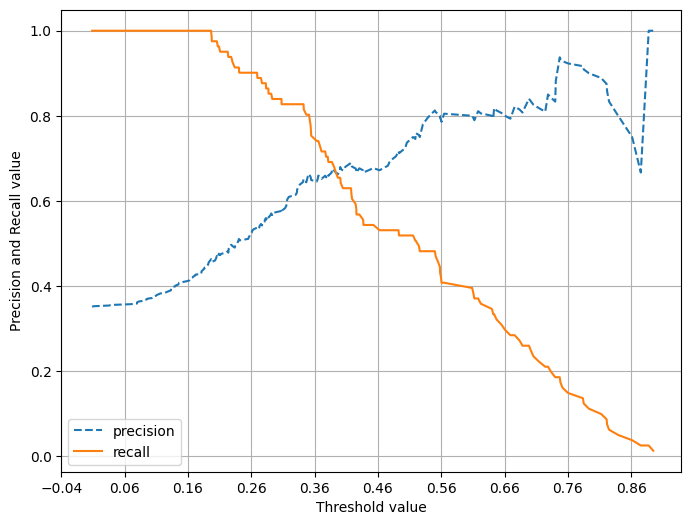

In [46]:
pred_proba_c1 = lr.predict_proba(test_input)[:,1]
precision_recall_curve_plot(test_target, pred_proba_c1)

2.7 그래프를 통해 확인했을 때 Threshold를 0.38정도로 설정했을 때 recall과 precision이 어느정도 균형이 맞음을 알 수 있습니다. 그러나 두 지표 모두 0.7 이하로 낮은 값이기에 다시 확인하도록 하겠습니다. 먼저 describe() 함수를 통해 개별 feature에 대한 분포도를 확인하세요.

In [47]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2.8 위에서 확인해봤을 때 min 값이 0으로 되어 있는 feature가 다수 존재합니다. Glucose(포도당 수치), BMI 지수가 0인 것은 말이 안 되므로 이들을 평균값으로 대체하세요.

In [48]:
### Glucose, BloodPressure, SkinThickness, Insulin, BMI에 대해 평균값으로 대체
diabetes_data[['Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]=diabetes_data[['Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0,diabetes_data[['Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].mean())

In [49]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2.9 이후 대체한 feature들에 대해 feature scaling을 진행하겠습니다. 모두 numeric feature이므로 X에 대해 StandardScaler를 일괄 적용하세요.

In [50]:
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

ss=StandardScaler()
X_scaled = ss.fit_transform(X)

2.10 feature scaling은 왜 사용하고 어떤 것들이 있는지 작성하세요.

각각의 특성이 모델에 미치는 영향을 동일하게 만들어서 모델의 성능을 개선하게 하기 위해서이다.  
Normalization(정규화): 피처를 스케일링하여 평균이 0이고 표준 편차가 1이 되도록 합니다.  
Standardization(표준화): 피처를 스케일링하여 평균이 0이고 분산이 1이 되도록 합니다.  
Min-max scaling(최소-최대 스케일링): 피처를 스케일링하여 최소값이 0이고 최대값이 1이 되도록 합니다.  
Robust scaling: 피처를 중앙값과 사분위 범위에 따라 스케일링합니다.  
Logarithmic scaling(로그 스케일링): 피처의 로그를 취합니다.  
Power transformation(거듭제곱 변환): 피처에 거듭제곱 변환을 적용합니다.

- 정규 분포를 따르는 데이터에는 정규화 또는 표준화를 사용합니다.  
- 정규 분포를 따르지 않는 데이터에는 최소-최대 스케일링을 사용합니다.
- 이상치가 있는 데이터에는 강건한 스케일링을 사용합니다.
- 값의 범위가 넓은 데이터에는 로그 스케일링이나 거듭제곱 변환을 사용합니다.

2.11 다시 에측하기에 앞서 위에서 scaling을 통해 변경된 X_scaled를 활용해 다시 train_test_split을 진행하세요(함수 파라미터 동일).

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=123, stratify=y)

2.12 로지스틱 회귀로 앞서 진행한 것과 동일하게 진행하세요.

In [52]:
lr=LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
pred_proba = lr.predict_proba(X_test)[:,1]

clf_eval(y_test, pred, pred_proba)

오차 행렬,
 [[130  20]
 [ 41  40]]
정확도: 0.7359, 정밀도: 0.6667, 재현율: 0.493827, F1: 0.5674, AUC:0.8505


### 3. 자유 분석
성능을 높일 수 있는 방법들을 활용해 예측을 진행하세요.

확률적 경사 하강법

In [53]:
from sklearn.linear_model import SGDClassifier

In [57]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=123)

sc.fit(X_train, y_train)

pred = sc.predict(X_test)
pred_proba = sc.predict_proba(X_test)[:,1]

clf_eval(y_test, pred, pred_proba)

오차 행렬,
 [[95 55]
 [42 39]]
정확도: 0.5801, 정밀도: 0.4149, 재현율: 0.481481, F1: 0.4457, AUC:0.6033


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [58]:
sc.partial_fit(X_train, y_train)

pred = sc.predict(X_test)
pred_proba = sc.predict_proba(X_test)[:,1]

clf_eval(y_test, pred, pred_proba)

오차 행렬,
 [[102  48]
 [ 40  41]]
정확도: 0.6190, 정밀도: 0.4607, 재현율: 0.506173, F1: 0.4824, AUC:0.6244


In [ ]:
recall = recall_score(y_test, pred)

In [61]:
sc = SGDClassifier(loss='log_loss', random_state=123)

train_score = []
test_score = []

for _ in range(0, 300):
    sc.partial_fit(X_train, y_train, classes=np.unique(y_train))

    train_score.append(sc.score(X_train, y_train))
    test_score.append(sc.score(X_test, y_test))

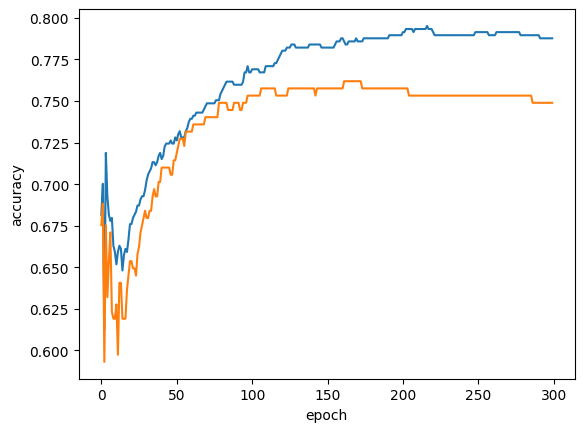

In [62]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [78]:
sc = SGDClassifier(loss='log_loss', max_iter=100, random_state=123)
sc.fit(X_train, y_train)

pred = sc.predict(X_test)
pred_proba = sc.predict_proba(X_test)[:,1]

clf_eval(y_test, pred, pred_proba)

오차 행렬,
 [[122  28]
 [ 27  54]]
정확도: 0.7619, 정밀도: 0.6585, 재현율: 0.666667, F1: 0.6626, AUC:0.8120


In [79]:
for _ in range(300):
    sc.partial_fit(X_train, y_train, classes=np.unique(y_train))

    pred = sc.predict(X_test)
    pred_proba = sc.predict_proba(X_test)[:,1]
    print(_)
    clf_eval(y_test, pred, pred_proba)

0
오차 행렬,
 [[124  26]
 [ 41  40]]
정확도: 0.7100, 정밀도: 0.6061, 재현율: 0.493827, F1: 0.5442, AUC:0.7203
1
오차 행렬,
 [[124  26]
 [ 41  40]]
정확도: 0.7100, 정밀도: 0.6061, 재현율: 0.493827, F1: 0.5442, AUC:0.7247
2
오차 행렬,
 [[124  26]
 [ 41  40]]
정확도: 0.7100, 정밀도: 0.6061, 재현율: 0.493827, F1: 0.5442, AUC:0.7277
3
오차 행렬,
 [[124  26]
 [ 41  40]]
정확도: 0.7100, 정밀도: 0.6061, 재현율: 0.493827, F1: 0.5442, AUC:0.7302
4
오차 행렬,
 [[124  26]
 [ 42  39]]
정확도: 0.7056, 정밀도: 0.6000, 재현율: 0.481481, F1: 0.5342, AUC:0.7330
5
오차 행렬,
 [[124  26]
 [ 42  39]]
정확도: 0.7056, 정밀도: 0.6000, 재현율: 0.481481, F1: 0.5342, AUC:0.7356
6
오차 행렬,
 [[126  24]
 [ 42  39]]
정확도: 0.7143, 정밀도: 0.6190, 재현율: 0.481481, F1: 0.5417, AUC:0.7380
7
오차 행렬,
 [[126  24]
 [ 42  39]]
정확도: 0.7143, 정밀도: 0.6190, 재현율: 0.481481, F1: 0.5417, AUC:0.7407
8
오차 행렬,
 [[127  23]
 [ 42  39]]
정확도: 0.7186, 정밀도: 0.6290, 재현율: 0.481481, F1: 0.5455, AUC:0.7439
9
오차 행렬,
 [[128  22]
 [ 42  39]]
정확도: 0.7229, 정밀도: 0.6393, 재현율: 0.481481, F1: 0.5493, AUC:0.7463
10
오차 행렬,
 [[129  21]
 [ 42  3